# Correlation (상관관계)

'06.corr.ipynb'

### 정의
두 변수간에 서로 얼마나 함께 변하는지 정도를 나타내는 통계 개념
값의 범위는 : -1 ~ +1
+1: 완벽한 양의 상관관계 -> x가 증가하면 y도 비례해서 증가 : 키 - 몸무게
0: 상관 없음 : 키와 수학점수
-1: 완벽한 음의 상관관계 -> x가 증가하면 y가 비례해서 감소 : 운동량 - 체지방률

### 상관 계수 (r))
두 변수간의 관계가 얼마나 강한지 측정하는 법 (대표)

- 피어슨 (Pearson): 가장 많이 쓰임. 연속 변수 선형 관계 측정
- 스피어맨 (Spearman): 순위(랭크) 기반, 비 선형 관계, 이상치에 강함
- 켄달 (Kendall) : 순위 일관성 기반, 표본이 적을 때 안정적

In [2]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scipy
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install -q kagglehub[pandas-dataset]

zsh:1: no matches found: kagglehub[pandas-dataset]
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


df = pd.read_csv('./OnlineRetail.csv', encoding='ISO-8859-1')

In [5]:
# from da_utils import profile, outliers, patterns

from da_utils import patterns, profile, outliers 


# 데이터 프로파일링
profile.get_data_profile(df)

종합 데이터 품질 리포트

1. 기본정보
- 데이터 크기: 541909행 x 8열
- 메모리 사용량: 173.12mb
- 수치형 변수: 3 개
- 범주형 변수: 5 개

2. 결측값 분석
⚠️


,결측수,결측율(%)
Description,1454,0.27
CustomerID,135080,24.93



3. 수치형 변수 품질 분석


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값비율(%),유일값비율(%)
0,Quantity,9.552,218.081,-80995.00,80995.0,-0.264,119769.160,10.817,0.133
1,UnitPrice,4.611,96.760,-11062.06,38970.0,186.507,59005.719,7.312,0.301
2,CustomerID,15287.691,1713.600,12346.00,18287.0,0.030,-1.180,0.000,1.075



4. 분포 이상 감지

- 극심한 왜도 (|skewness|>2)
⚠️
-- UnitPrice: 왜도 = 186.507

- 높은 이상값 비율(>5%)
⚠️
-- Quantity: 이상값 10.8%
-- UnitPrice: 이상값 7.3%


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값비율(%),유일값비율(%)
0,Quantity,9.552,218.081,-80995.00,80995.0,-0.264,119769.160,10.817,0.133
1,UnitPrice,4.611,96.760,-11062.06,38970.0,186.507,59005.719,7.312,0.301
2,CustomerID,15287.691,1713.600,12346.00,18287.0,0.030,-1.180,0.000,1.075


=== 결측값 패턴 분석 ===
변수별 결측 현황


,결측수,결측률(%)
CustomerID,135080,24.93
Description,1454,0.27


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

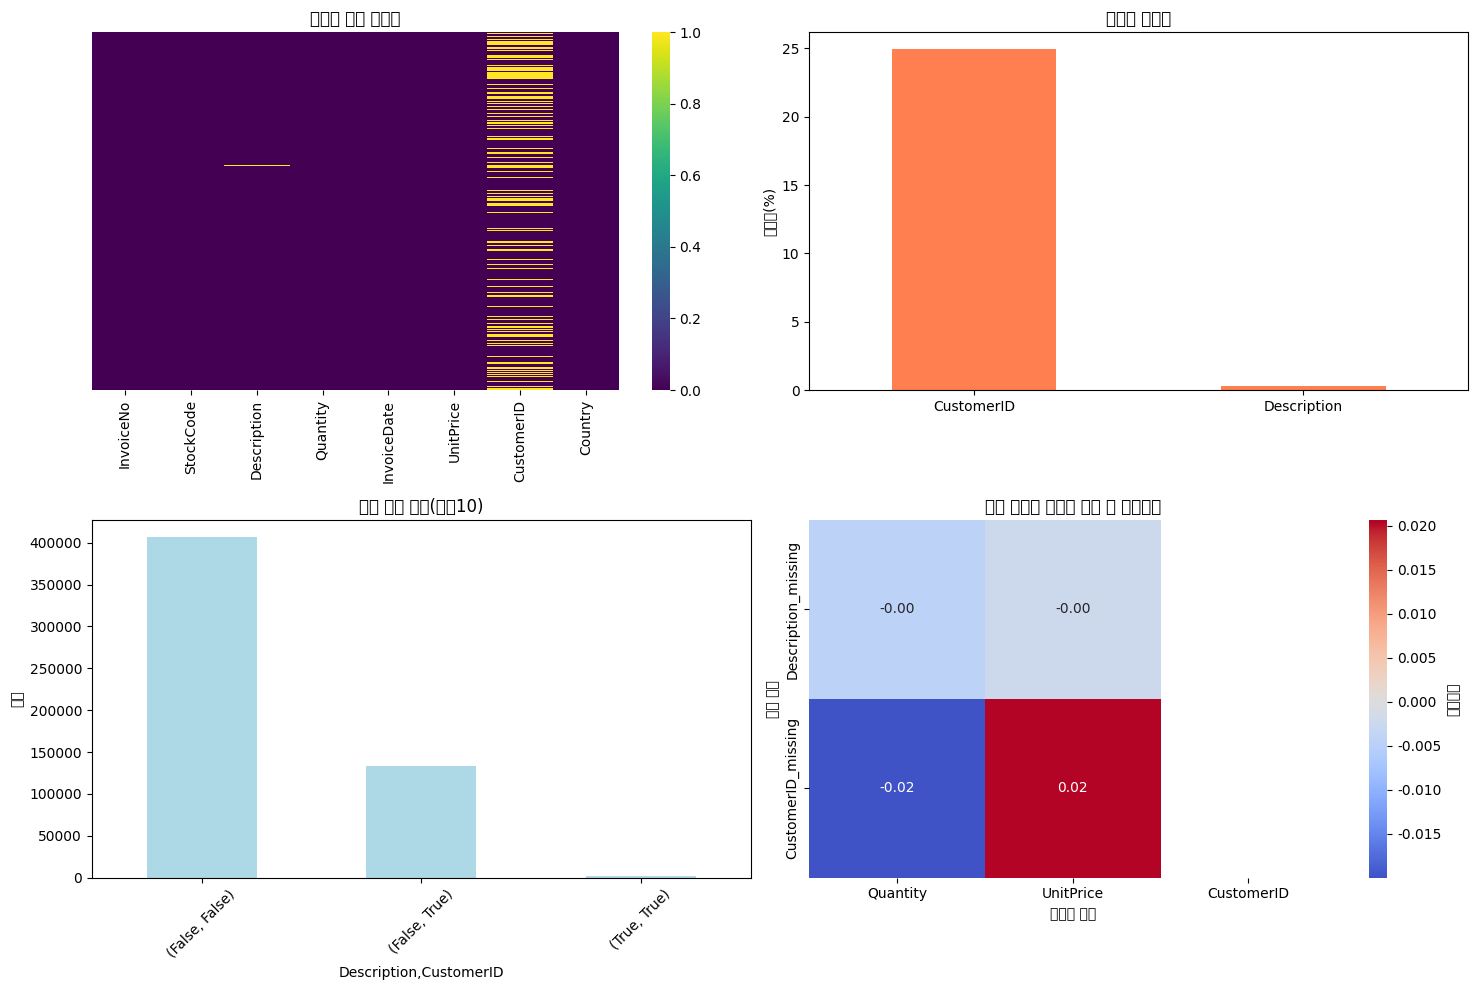

,결측수,결측률(%)
CustomerID,135080,24.93
Description,1454,0.27


In [18]:
# 결측치 모니터링 함수 
patterns.analyze_missing_patterns(df)

In [19]:
# 데이터 전처리
df_clean = df.copy()

# CustomerID 결측값 제거 (고객 단위 분석을 위해 필수)
missing_customers = df_clean['CustomerID'].isnull().sum()
print(f'CustomerID 결측값 제거: {missing_customers}건')
df_clean = df_clean.dropna(subset=['CustomerID'])

# 취소 거래 분리 (InvoiceNo 가 'C' 로 시작)
cancel_mask = df_clean['InvoiceNo'].astype('str').str.startswith('C')
# 취소거래, 정상거래 분리
df_cancel = df_clean[cancel_mask]
df_clean = df_clean[~cancel_mask]
print(f'취소거래 분리: {len(df_cancel)}건')
print(f'정상 거래: {len(df_clean)}건')

# df_clean에 파생 변수 생성 (상관 관계 분석)
# TotalAmount, InvoiceDate(DateTime), Year, Month, DayOfWeek(숫자), Hour, DayName(글자), CustomerID(Str)
df_clean['CustomerID'] = df_clean['CustomerID'].astype(int).astype(str)
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month']= df_clean['InvoiceDate'].dt.month
df_clean['DayOfWeek']= df_clean['InvoiceDate'].dt.dayofweek
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour
df_clean['DayName'] = df_clean['InvoiceDate'].dt.day_name()

print('\n=== 이상값 확인 ===')
print(f'음수 수량: {(df_clean['Quantity'] < 0).sum()}')
print(f'음수 단가: {(df_clean['UnitPrice'] < 0).sum()}')
print(f'0 단가: {(df_clean['UnitPrice'] == 0).sum()}')

# 양수 수량 & 양수 단가 데이터만 살리기
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]

df_clean.info()

CustomerID 결측값 제거: 135080건
취소거래 분리: 8905건
정상 거래: 397924건

=== 이상값 확인 ===
음수 수량: 0
음수 단가: 0
0 단가: 40
<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  object        
 7   Country      397884 non-null  object        
 8   TotalAmount  397884 non-null  float64       
 9   Year         397884 non-null  int32         
 10  Month        397884 non-null  int32         
 11  DayOfWeek    397884 non-null  int32         
 12  Hour         397884 non-null  int32         
 13  DayName      397884 non-null  object   

In [20]:
# 이상치 탐지 함수 (결측치 처리후 실행 필요)

outliers.outlier_detection(df_clean, 0.999, iso_cont='auto', final_threshold=2)

=== 종합 이상값 탐지 시스템 ===
1. 일변량 이상값 탐지 (IQR방법)
  Quantity: 25647개 (6.4%)
  UnitPrice: 34356개 (8.6%)
  TotalAmount: 31241개 (7.9%)
  Year: 26157개 (6.6%)
  Hour: 4124개 (1.0%)

2. 다변량 이상값 탐지 (마할라노비스 거리)
  임계값: 4.93
  다변량 이상값: 937개 (0.2%)

3. 다변량 이상값 탐지 (Isolation Forest)
  Isolation Forest 이상값: 63254개 (15.9%)

 == 최종 이상값: 60719개 (15.3%)


(          일변량  Mahal Dist  Iso Forest  총이상값수
 0        True       False        True      2
 1        True       False        True      2
 2        True       False        True      2
 3        True       False        True      2
 4        True       False        True      2
 ...       ...         ...         ...    ...
 541904  False       False       False      0
 541905  False       False       False      0
 541906  False       False       False      0
 541907  False       False       False      0
 541908  False       False       False      0
 
 [397884 rows x 4 columns],
 0          True
 1          True
 2          True
 3          True
 4          True
           ...  
 541904    False
 541905    False
 541906    False
 541907    False
 541908    False
 Name: 총이상값수, Length: 397884, dtype: bool)

In [21]:
print('=== 고객별 구매 패턴 특성 DF 생성 ===')

customer_stats = df_clean.groupby('CustomerID').agg({
    'InvoiceNo':  'nunique',  # 구매 횟수(Frequency)
    'Quantity': ['sum', 'mean'],  # 총구매량, 평균구매량
    'UnitPrice': 'mean',  # 평균 단가
    'TotalAmount': ['sum', 'mean'],  # 총 구매액(Monetary), 평균 구매액
    'StockCode': 'nunique',  # 구매한 상품 종류 수
    'InvoiceDate': ['min', 'max'],  # 첫 구매일, 마지막 구매일
}).round(2)

# 컬럼명 정리 (구매횟수==F, 총구매액==M)
customer_stats.columns = ['Frequency', '총구매량', '평균구매량', '평균단가', 
                        'Monetary', '평균구매액', '상품종류수', '첫구매일', '마지막구매일']

# 구매 기간 및 주기 계산 (추가하기)
customer_stats['구매기간일수'] = (customer_stats['마지막구매일'] - customer_stats['첫구매일']).dt.days + 1
customer_stats['구매주기'] = customer_stats['구매기간일수'] / customer_stats['Frequency']

# RFM 분석 변수
analysis_date = df_clean['InvoiceDate'].max() + pd.Timedelta(days=1)
customer_stats['Recency'] = (analysis_date - customer_stats['마지막구매일']).dt.days


# RFM점수 (모두 5등급) (.qcut으로 5등분) # qcut : 상대평가 
customer_stats['R_score'] = pd.qcut(customer_stats['Recency'], 5, labels=[5,4,3,2,1])
customer_stats['F_score'] = pd.qcut(customer_stats['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
customer_stats['M_score'] = pd.qcut(customer_stats['Monetary'], 5, labels=[1,2,3,4,5])
customer_stats['RFM_score'] = (customer_stats['R_score'].astype(str) + \
                                customer_stats['F_score'].astype(str) + \
                                customer_stats['M_score'].astype(str))
# 추가정보
customer_stats['평균장바구니크기'] = customer_stats['총구매량'] / customer_stats['Frequency']
customer_stats['거래당상품종류'] = customer_stats['상품종류수'] / customer_stats['Frequency']

# 가격 민감도 - 단가가 상대적으로 일관되게 유지되는가?
# CV = Coefficient of Variation (표준편차 / 평균) => 높으면, 다양한 가격대로 산다 / 낮으면, 특정 가격대에 고정적 구매
price_cv = df_clean.groupby('CustomerID')['UnitPrice'].agg(['mean', 'std'])
price_cv['가격변동성'] = (price_cv['std'] / price_cv['mean']).fillna(0)

customer_stats = customer_stats.merge(
    price_cv[['가격변동성']], # 두 DF 다 컬럼이 아닌 인덱스가 CustomerID
    left_index=True,   # customer_stats의 인덱스 기준으로 병합
    right_index=True   # price_cv의 인덱스 기준으로 병합
)

customer_stats

=== 고객별 구매 패턴 특성 DF 생성 ===


,Frequency,총구매량,평균구매량,평균단가,Monetary,평균구매액,상품종류수,첫구매일,마지막구매일,구매기간일수,구매주기,Recency,R_score,F_score,M_score,RFM_score,평균장바구니크기,거래당상품종류,가격변동성
CustomerID,,,,,,,,,,,,,,,,,,,
12346,1,74215,74215.00,1.04,77183.60,77183.60,1,2011-01-18 10:01:00,2011-01-18 10:01:00,1,1.000000,326,1,1,5,115,74215.000000,1.000000,0.000000
12347,7,2458,13.51,2.64,4310.00,23.68,103,2010-12-07 14:57:00,2011-12-07 15:52:00,366,52.285714,2,5,5,5,555,351.142857,14.714286,0.853015
12348,4,2341,75.52,5.76,1797.24,57.98,22,2010-12-16 19:09:00,2011-09-25 13:13:00,283,70.750000,75,2,4,4,244,585.250000,5.500000,2.324492
12349,1,631,8.64,8.29,1757.55,24.08,73,2011-11-21 09:51:00,2011-11-21 09:51:00,1,1.000000,19,4,1,4,414,631.000000,73.000000,4.225823
12350,1,197,11.59,3.84,334.40,19.67,17,2011-02-02 16:01:00,2011-02-02 16:01:00,1,1.000000,310,1,1,2,112,197.000000,17.000000,2.430180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,1,45,4.50,4.76,180.60,18.06,10,2011-03-07 09:52:00,2011-03-07 09:52:00,1,1.000000,278,1,2,1,121,45.000000,10.000000,0.518798
18281,1,54,7.71,5.62,80.82,11.55,7,2011-06-12 10:53:00,2011-06-12 10:53:00,1,1.000000,181,1,2,1,121,54.000000,7.000000,1.383397
18282,2,103,8.58,5.20,178.05,14.84,12,2011-08-05 13:35:00,2011-12-02 11:43:00,119,59.500000,8,5,3,1,531,51.500000,6.000000,0.937819


In [22]:
print('=== 기본 상관관계 분석 ===')

numeric_cols =  ['Frequency', '총구매량', '평균구매량', '평균단가', 'Monetary', 
                   '평균구매액', '상품종류수', '구매기간일수', '구매주기', 'Recency', 
                    '평균장바구니크기', '거래당상품종류', '가격변동성']

correlation_data = customer_stats[numeric_cols]
correlation_data.head(3)

=== 기본 상관관계 분석 ===


,Frequency,총구매량,평균구매량,평균단가,Monetary,평균구매액,상품종류수,구매기간일수,구매주기,Recency,평균장바구니크기,거래당상품종류,가격변동성
CustomerID,,,,,,,,,,,,,
12346,1,74215,74215.00,1.04,77183.60,77183.60,1,1,1.000000,326,74215.000000,1.000000,0.000000
12347,7,2458,13.51,2.64,4310.00,23.68,103,366,52.285714,2,351.142857,14.714286,0.853015
12348,4,2341,75.52,5.76,1797.24,57.98,22,283,70.750000,75,585.250000,5.500000,2.324492


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

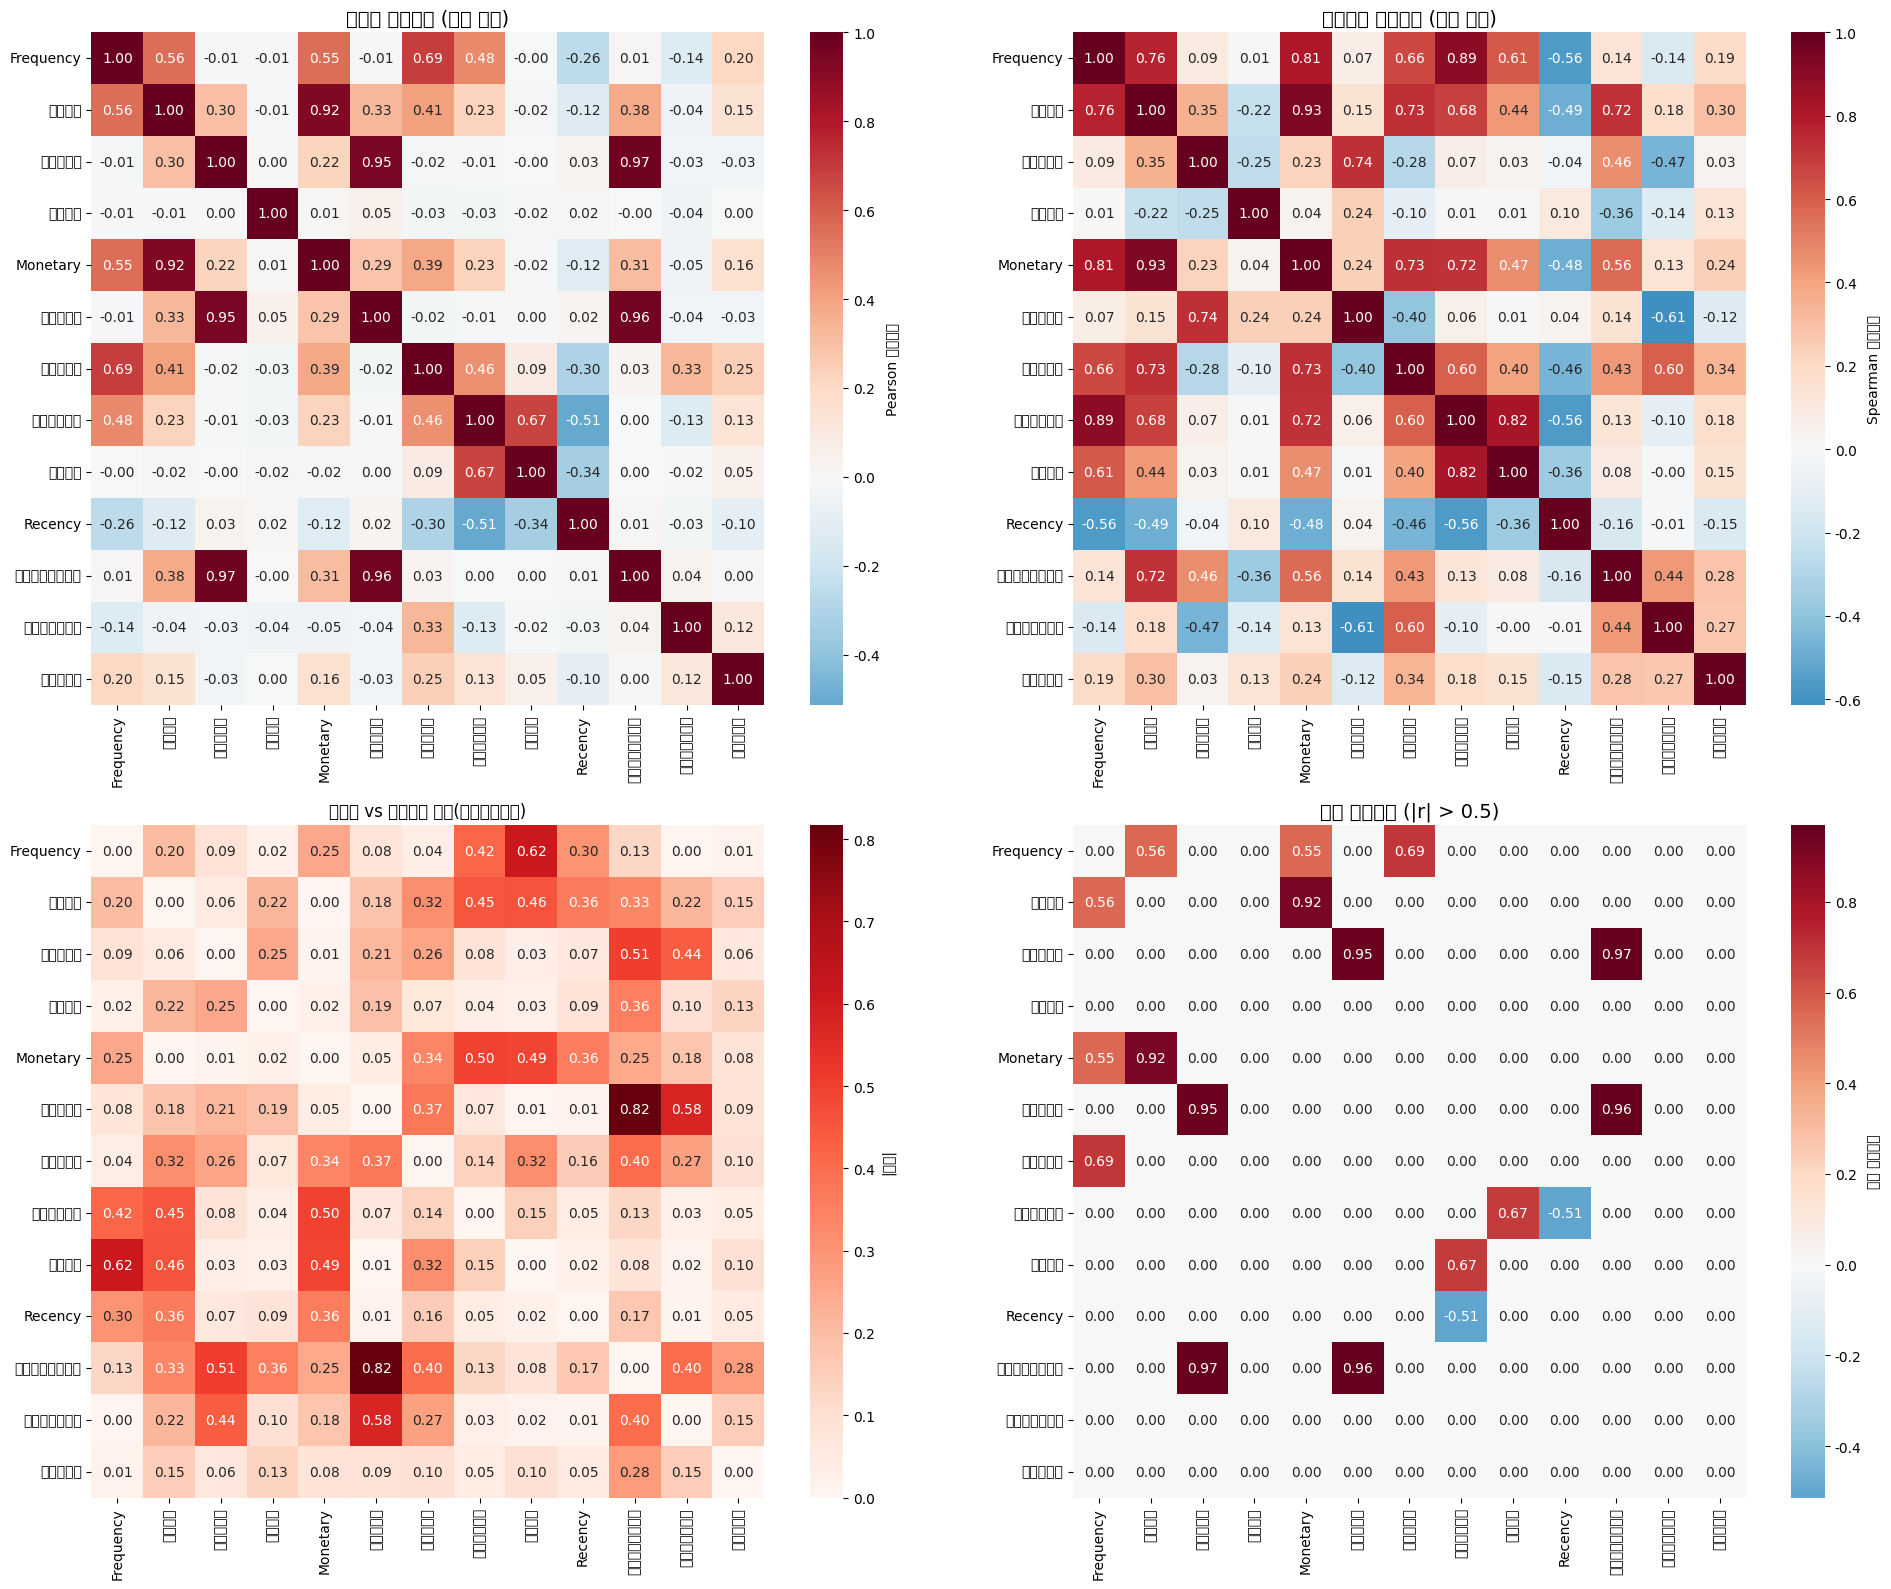

In [23]:
# 피어슨 상관관계 - 키<->몸무게 / 온도<->전력 같이 실제 값이 비례하는 경우 (값)
pearson_corr = correlation_data.corr(method='pearson')
# 스피어만 상관관계 - 시험순위<->대회순위 / 만족도<->재구매의사 같이 서열형 관계에 적합 (순서)
spearman_corr = correlation_data.corr(method='spearman')

fig, axes = plt.subplots(2, 2, figsize=(20, 16))
a1, a2, a3, a4 = axes[0,0], axes[0,1], axes[1,0], axes[1,1]

# 피어슨 상관관계 히트맵    
sns.heatmap(pearson_corr, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, ax=a1, cbar_kws={'label': 'Pearson 상관계수'})
a1.set_title('피어슨 상관관계 (선형 관계)', fontsize=14)

# 스피어만 상관관계 히트맵
sns.heatmap(spearman_corr, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, ax=a2, cbar_kws={'label': 'Spearman 상관계수'})
a2.set_title('스피어만 상관관계 (순위 기반)', fontsize=14)

corr_diff = abs(spearman_corr - pearson_corr)
sns.heatmap(corr_diff, annot=True, fmt='.2f', cmap='Reds',
             square=True, ax=a3, cbar_kws={'label': '|차이|'})
a3.set_title('피어슨 vs 스피어만 차이(비선형성지표)')

# 강한 상관관계 (|r| > 0.5) 네트워크
strong_corr = pearson_corr.copy()
strong_corr[abs(strong_corr) < 0.5] = 0

np.fill_diagonal(strong_corr.values, 0)
sns.heatmap(strong_corr, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, ax=a4, cbar_kws={'label': '강한 상관관계'})
a4.set_title('강한 상관관계 (|r| > 0.5)', fontsize=14)
    
plt.tight_layout()
plt.show()

In [ ]:
# 주요 발견사항 요약
print('\n=== 주요 상관관계 발견사항===')
# 아래 히트맵에서 위쪽 삼각형만 보겠다.
upper_triangle = np.triu(pearson_corr, k=1)

# 가장 큰 값이 있는 인덱스
strong_positive = np.unravel_index(np.argmax(upper_triangle),upper_triangle.shape)

# 가장 강햔 양의 상관관계
max_corr = pearson_corr.iloc[strong_positive]
print(f'가장 강한 양의 상관관계:')
print(f'{pearson_corr.index[strong_positive[0]]} <-> {pearson_corr.index[strong_positive[1]]}')

strong_negative = np.unravel_index(np.argmin(upper_triangle), upper_triangle.shape)
min_corr = pearson_corr.iloc[strong_negative]

print(f'가장 강한 음의 상관 관계: {min_corr:.3f}')
print(f'  {pearson_corr.index[strong_negative[0]]} <-> {pearson_corr.index[strong_negative[1]]}')

 


=== 주요 상과노간계 발견사항===
가장 강한 양의 상관관계:
평균구매량 <-> 평균장바구니크기
가장 강한 음의 상관 관계: -0.514
  구매기간일수 <-> Recency


In [ ]:
print('매출 증대 핵심 요인')
monetary_corr = pearson_corr['Monetary'].abs().sort_values(ascending=False)
for factor, corr in monetary_corr.head(6).items():
    if factor != 'Monetary':
        print(f' {factor}: {corr:3f}')  

print('\n 고객 충성도 관련 요인')
frequency_corr = pearson_corr['Frequency'].abs().sort_values(ascending=False)
for factor, corr in frequency_corr.head(6).items():
    if factor != 'Frequency':
        print(f' {factor}: {corr:3f}')  




매출 증대 핵심 요인
 총구매량: 0.922907
 Frequency: 0.553650
 상품종류수: 0.386977
 평균장바구니크기: 0.310360
 평균구매액: 0.287264

 고객 충성도 관련 요인
 상품종류수: 0.692223
 총구매량: 0.558081
 Monetary: 0.553650
 구매기간일수: 0.476560
 Recency: 0.260578


In [ ]:
# 일종의 다항식 함수를 만들어 주는 애 ? 
z = np.polyfit([1,2,3],[2,4,6],1) # 기울기와 절편만 뽑았다면 
p = np.poly1d(z) # 이건 함수화 
p

poly1d([2.00000000e+00, 1.53837015e-15])

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

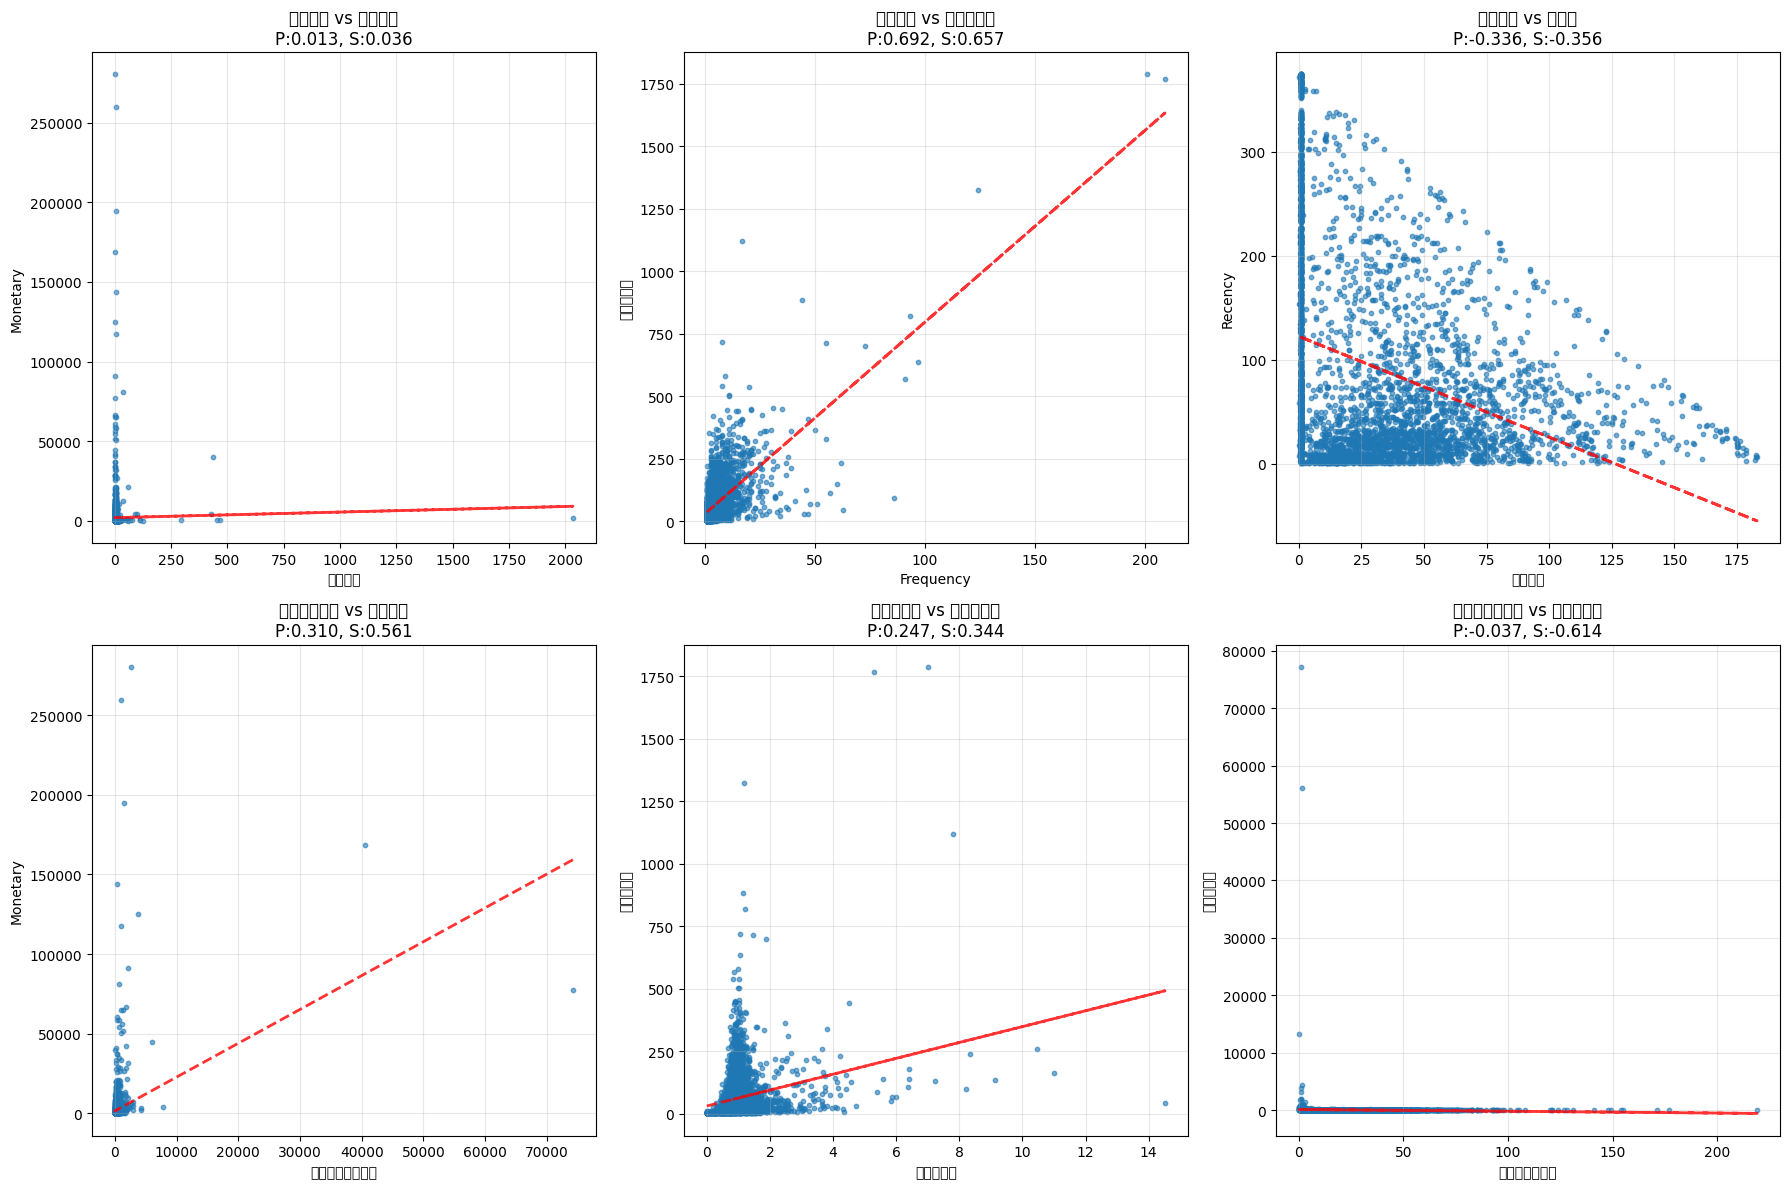

In [ ]:
fig, axes =plt.subplots(2,3, figsize=(18,12))
# 그래프 2차원 리스트 -> 1차원으로 평탄화 

axes = axes.ravel()

# 아래꺼 의도가 뭐지 ?
relationships = [ 
    ('평균단가', 'Monetary', '평균단가 vs 총구매액'),
    ('Frequency', '상품종류수', '구매횟수 vs 상품종류수'),
    ('구매주기', 'Recency', '구매주기 vs 최근성'), 
    ('평균장바구니크기', 'Monetary', '장바구니크기 vs 총구매액'),
    ('가격변동성', '상품종류수', '가격변동성 vs 상품종류수'),
    ('거래당상품종류', '평균구매액', '거래당상품종류 vs 평균구매액')
]

for idx, (x, y, title) in enumerate(relationships):
    # 산점도 
    axes[idx].scatter(customer_stats[x], customer_stats[y], alpha=0.6, s=10)
    # 선형 회귀선(트렌드라인)
    z = np.polyfit(customer_stats[x], customer_stats[y], 1)  # 1-> 1차함수로 뽑아라
    # 데이터별 1차함수
    p = np.poly1d(z)
    axes[idx].plot(customer_stats[x], p(customer_stats[x]), 'r--', alpha=0.8, linewidth=2)

    # 둘 다 높음 -> 강산 선형 +순위
    # P > S -> 값은 비례하지만 순위는 뒤바뀜
    # S < P -> 순위는 일정하지만 비선형관계
    # 둘 다 낮음 : 상관관계 거의 없음 

    
    pearson_r = customer_stats[x].corr(customer_stats[y], method='pearson')
    spearman_r = customer_stats[x].corr(customer_stats[y], method='spearman')

    axes[idx].set_xlabel(x)
    axes[idx].set_ylabel(y)
    axes[idx].set_title(f'{title}\nP:{pearson_r:.3f}, S:{spearman_r:.3f}')
    axes[idx].grid(True, alpha=0.3)


    # ??? 위에서 놓인거 없나 ? 주석만 놓였나 ?

plt.tight_layout()
plt.show()

In [40]:
# 고급 상관관계 측정
print('=== 고급 상관관계 측정 ===')

# 핵심 변수(컬럼)들 선택
key_vars = ['Monetary','Frequency','Recency','평균단가','상품종류수','평균장바구니크기']
analysis_data =customer_stats[key_vars].copy()

kendall_results = {}

"""
켄달 타우- 스피어만 : 둘 다 순위 기반

켄달타우 : 데이터의 갯수가 적거나 순위 정보만 확실한 경우, 이상치가 있거나 동점자가 많은 경우
스피어만 : 연속셩 데이터이지만, 선형이 아닐 때, 이상치 없고 동점자가 적은 경우 

"""

from scipy.stats import kendalltau

# 켄달 타우 상관계수 (순위 기반 - 이상값에 강함)
print('1. 켄달 타우 상관관계 분석')
for idx, var1 in enumerate(key_vars):
    for var2 in key_vars[idx+1:]: # idx+1 : idx =idx+1
        tau, p_value = kendalltau(analysis_data[var1],analysis_data[var2])
        # 켄달 타우 결과 확인(유의미한 관계만 -> p_value <0.05)
        if p_value < 0.05 and abs(tau) >0.1 : # abs가 절대값 처리 해주는건가 보네
            kendall_results[f'{var1} vs {var2}'] = {'tau' : tau, 'p_value' : p_value}

for rel, stats in kendall_results.items():
    print(f' {rel} ={stats['tau']:.3f} (p={stats['p_value']:.3f})')





=== 고급 상관관계 측정 ===
1. 켄달 타우 상관관계 분석
 Monetary vs Frequency =0.657 (p=0.000)
 Monetary vs Recency =-0.335 (p=0.000)
 Monetary vs 상품종류수 =0.555 (p=0.000)
 Monetary vs 평균장바구니크기 =0.396 (p=0.000)
 Frequency vs Recency =-0.425 (p=0.000)
 Frequency vs 상품종류수 =0.505 (p=0.000)
 Frequency vs 평균장바구니크기 =0.101 (p=0.000)
 Recency vs 상품종류수 =-0.318 (p=0.000)
 Recency vs 평균장바구니크기 =-0.107 (p=0.000)
 평균단가 vs 평균장바구니크기 =-0.251 (p=0.000)
 상품종류수 vs 평균장바구니크기 =0.300 (p=0.000)


In [42]:
# 상호 정보량(Mutal Information) 기반 분석
# 선형, 비선형 구분 없이 변수간 정보량 공유 정도르 측정
# MI = 0 -> 전혀 관련 없음
# MI >= 1 -> 꽤 관련 있음
# MI > 큼 -> 뱐수 X는 변수  Y의 예측에 유용하다.


# 켄달타우 -> '방향'과 '순위'의 일관성
# MI점수 -> '관계'가 있긴한데 +- 몰라, 그냥 둘이 강하게 연결 되어 있는거냐

from sklearn.feature_selection import mutual_info_regression
print('2.상호정보량 기반 연관성(Monetary 기준')
# Monetary를 타겟으로 상호 정보량 계산
target = analysis_data['Monetary']
features = analysis_data.drop('Monetary', axis = 1)
mi_scores = mutual_info_regression(features, target, random_state=42)
mi_results = pd.DataFrame({
    'Feature' : features.columns,
    'MI_Score' : mi_scores 
}).sort_values('MI_Score', ascending=False)


for _, row in mi_results.iterrows():
    print(f'  {row['Feature']}: {row['MI_Score']:.3f}')



2.상호정보량 기반 연관성(Monetary 기준
  Frequency: 0.554
  상품종류수: 0.516
  평균장바구니크기: 0.237
  Recency: 0.138
  평균단가: 0.057


In [44]:
# 조건부 상관관계 분석(고객 세그먼크별) - VIP, 일반, 신규

customer_stats['Segment'] = 'Regular'

vip_mask = (
    (customer_stats['R_score'].astype(int) >= 4) &
    (customer_stats['F_score'].astype(int) >= 4) &
    (customer_stats['M_score'].astype(int) >= 4) 
    )

customer_stats.loc[vip_mask, 'Segment'] = 'VIP'

new_mask = customer_stats['Frequency'] == 1
customer_stats.loc[new_mask, 'Segment'] = 'New' # 여기서 loc의 의미를 분명히 이해하고 싶은데 loc이 index관련으로 기억하고 있는데 

segments = ['VIP', 'Regular', 'New']
segment_corrs = {} # 이거 왜 만드는거지 ? 


for seg in segments : 
        seg_data = customer_stats[customer_stats['Segment'] == seg]
        if len(seg_data) >10:
                # 세그먼트 별로 F <P> M
            corr = seg_data['평균단가'].corr(seg_data['Monetary'])
            segment_corrs[seg] = {
                    'corr' : corr,
                    'size' : len(seg_data)
            } 
            print(f'  {seg} 고객: M - F = {corr:.3f}, (n={len(seg_data)})')

  VIP 고객: M - F = 0.012, (n=962)
  Regular 고객: M - F = 0.157, (n=1883)
  New 고객: M - F = 0.018, (n=1493)


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

===U자형 관계 탐지===
   가격변동성 상위 10% 고객 특성:
   - 평균 상품종류수: 76.8개
   - 평균 총구매액: 3,897원
   - 평균 구매횟수: 5.6회


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

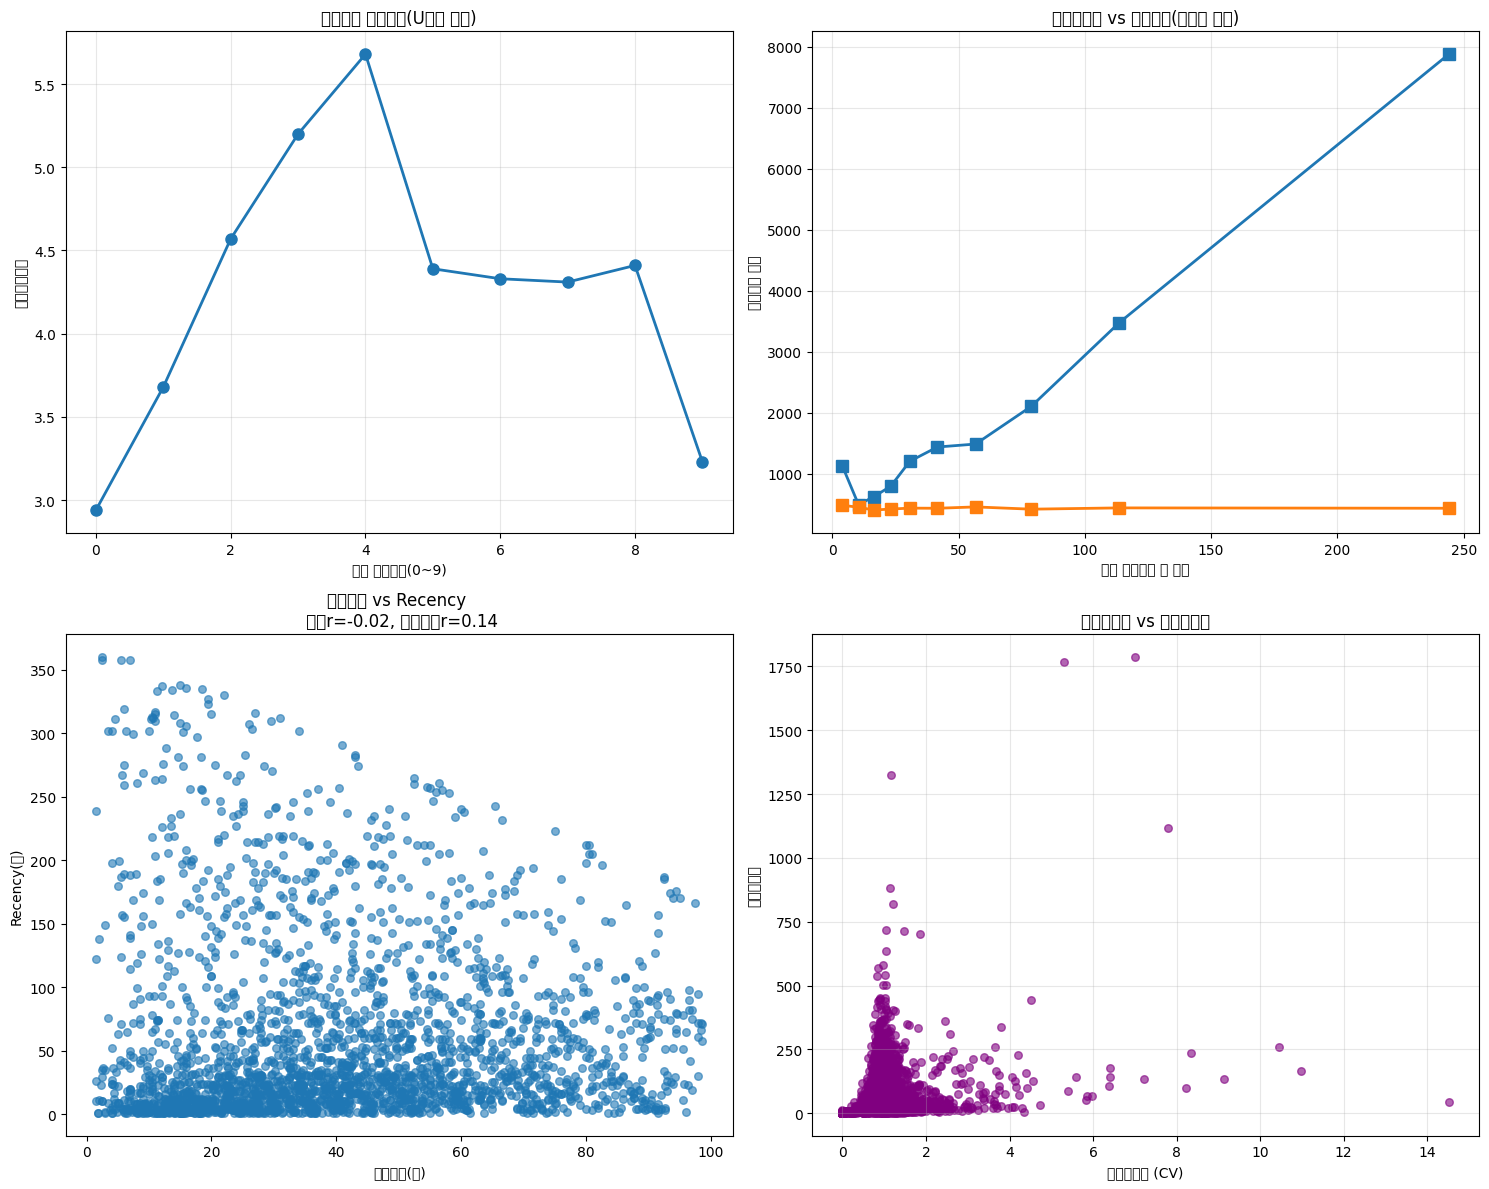

In [62]:
# 비선형 패턴 심화

print('===U자형 관계 탐지===')

fig, axes =plt.subplots(2,2, figsize=(15,12))
a1,a2,a3,a4 = axes.ravel()

# 평균 단가 구간별 구매횟수 분석
customer_stats['Price_Segment'] = pd.qcut(customer_stats['평균단가'], q= 10, labels=False, duplicates='drop')


price_freq_analysis = customer_stats.groupby('Price_Segment').agg({
    'Frequency' : ['mean','count'],
    '평균단가' : 'mean',
    'Monetary' : 'mean'
}).round(2)

price_freq_analysis.columns = ['평균구매횟수','고객수','평균단가','평균총구매액']

# X축 - 세그먼트, Y축 평균구매횟수(나머지 컬럼들도 세팅 가능)
a1.plot(price_freq_analysis.index, price_freq_analysis['평균구매횟수'], marker ='o', linewidth=2, markersize=8)
a1.set_xlabel('가격 세그먼트(0~9)')
a1.set_ylabel('평균구매횟수')
a1.set_title('가격대별 구매빈도(U자형 탐지)')
a1.grid(True, alpha=0.3)


# 상품 다양성 <-> 총구매액
customer_stats['Variety_Segment'] = pd.qcut(customer_stats['상품종류수'], q=10, labels=False, duplicates='drop' )

variety_analysis = customer_stats.groupby('Variety_Segment').agg({
    'Monetary' : ['mean','count'],
    '평균구매액' : 'mean',
    '상품종류수' : 'mean'
}).round(2)

a2.plot(variety_analysis['상품종류수'], variety_analysis['Monetary'], marker ='s', linewidth=2, markersize=8)
a2.set_xlabel('구매 상품종류 수 평균') # 수정 중
a2.set_ylabel('총구매액 평균')
a2.set_title('상품다양성 vs 총구매개(포화점 탐지)')
a2.grid(True, alpha=0.3)

# 3. 구매주기와 Recency의 관계 (지수적 관계 확인용)
# 정사적인 구매
valid_cycle = customer_stats[customer_stats['구매주기'] < customer_stats['구매주기'].quantile(0.95)]
# 한 번 구매한 사람들, 처음 구매한 사람들 필터링
valid_cycle = valid_cycle[valid_cycle['구매주기'] > 1]

a3.scatter(valid_cycle['구매주기'],valid_cycle['Recency'], alpha=0.6, s=30)

a3.set_xlabel('구매주기(일)')
a3.set_ylabel('Recency(일)')

# 로그 변환 선형화 
## 아래꺼 시리즈에서 데이터프레임으로 변환
log_cycle = pd.Series(np.log1p(valid_cycle['구매주기']))
log_recency = pd.Series(np.log1p(valid_cycle['Recency']))

original_corr = valid_cycle['구매주기'].corr(valid_cycle['Recency'])
log_corr = log_cycle.corr(log_recency)
a3.set_title(f'구매주기 vs Recency \n 원본r={original_corr:.2f}, 로그변환r={log_corr:.2f}')

# 가격변동성과 상품종류수 관계
a4.scatter(customer_stats['가격변동성'], customer_stats['상품종류수'], 
                    alpha=0.6, s=30, color='purple')

# 가격변동성이 높은 고객들의 특성
high_variation = customer_stats['가격변동성'] > customer_stats['가격변동성'].quantile(0.9)

print(f"   가격변동성 상위 10% 고객 특성:")
print(f"   - 평균 상품종류수: {customer_stats[high_variation]['상품종류수'].mean():.1f}개")
print(f"   - 평균 총구매액: {customer_stats[high_variation]['Monetary'].mean():,.0f}원")
print(f"   - 평균 구매횟수: {customer_stats[high_variation]['Frequency'].mean():.1f}회")

a4.set_xlabel('가격변동성 (CV)')
a4.set_ylabel('상품종류수')
a4.set_title('가격변동성 vs 상품다양성')
a4.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
# 범주형 해보자

print('=== 범주형 변수 연관성 분석===')

print('1. 국가별 구매 패턴 분석')
# 구매 횟수 많은 상위 10개국 

country_counts = df_clean['Country'].value_counts().head(10)
major_countries = country_counts.index.to_list()
df_major = df_clean[df_clean['Country'].isin(major_countries)].copy()



# 국가별 집계 분석
country_analysis = df_major.groupby('Country').agg({
    'TotalAmount': ['sum', 'mean', 'count'],
    'Quantity': 'mean',
    'UnitPrice': 'mean',
    'CustomerID': 'nunique',
}).round(2)

country_analysis.columns = ['총매출', '평균거래액', '거래수', '평균수량','평균단가','고객수']
country_analysis['고객당매출'] = (country_analysis['총매출'] / country_analysis['고객수']).round(2)



# 2. 시간대별 구매 패턴 분석
print('\n 시간대별 구매 패턴')
hourly_analysis = df_clean.groupby('Hour').agg({
    'TotalAmount': ['sum','mean','count'],
    'CustomerID' : 'nunique',
}).round(2)



hourly_analysis.columns = ['총매출','평균거래액', '거래수', ' 고객수']
peak_hours = hourly_analysis.nlargest(3,'거래수')
print('거래량 상위 3개 시간대')
for hour in peak_hours.index:
    print(f'  {hour}시: {peak_hours.loc[hour,'거래수']}건')


# 3. 요일별 구매 패턴
print('\n 요일별 구매 패턴')
daily_analysis = df_clean.groupby('DayName').agg({
    'TotalAmount': ['sum','mean'],
    'Quantity' : 'sum',
    'CustomerID' : 'nunique',
}).round(2)

daily_analysis.columns = ['총매출', '평균거래액', '총수량', '고객수']
# 요일 순서 정렬 (인덱스 재정렬)

# nlargest 총매출로 가장 많이 팔리는 요일 3개 분석
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']
daily_analysis = daily_analysis.reindex(day_order)
peak_days = daily_analysis.nlargest(3, '총매출')

for day in peak_days.index:
    print(f'  {day}: {peak_days.loc[day, '총매출']}원')
print('요일별 매출 현황')
display(daily_analysis)


=== 범주형 변수 연관성 분석===
1. 국가별 구매 패턴 분석

 시간대별 구매 패턴
거래량 상위 3개 시간대
  12시: 72065건
  13시: 64026건
  14시: 54118건

 요일별 구매 패턴
  Thursday: 1976859.07원
  Tuesday: 1700634.63원
  Wednesday: 1588336.17원
요일별 매출 현황


,총매출,평균거래액,총수량,고객수
DayName,,,,
Monday,1367146.41,21.07,769001,1595
Tuesday,1700634.63,25.58,1007859,1701
Wednesday,1588336.17,23.06,962417,1778
Thursday,1976859.07,24.70,1151845,2007
Friday,1485917.40,27.10,810218,1557
Sunday,792514.22,12.63,466472,1225


=== 카이제곱 검정 & Cramer's V 분석 ===


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

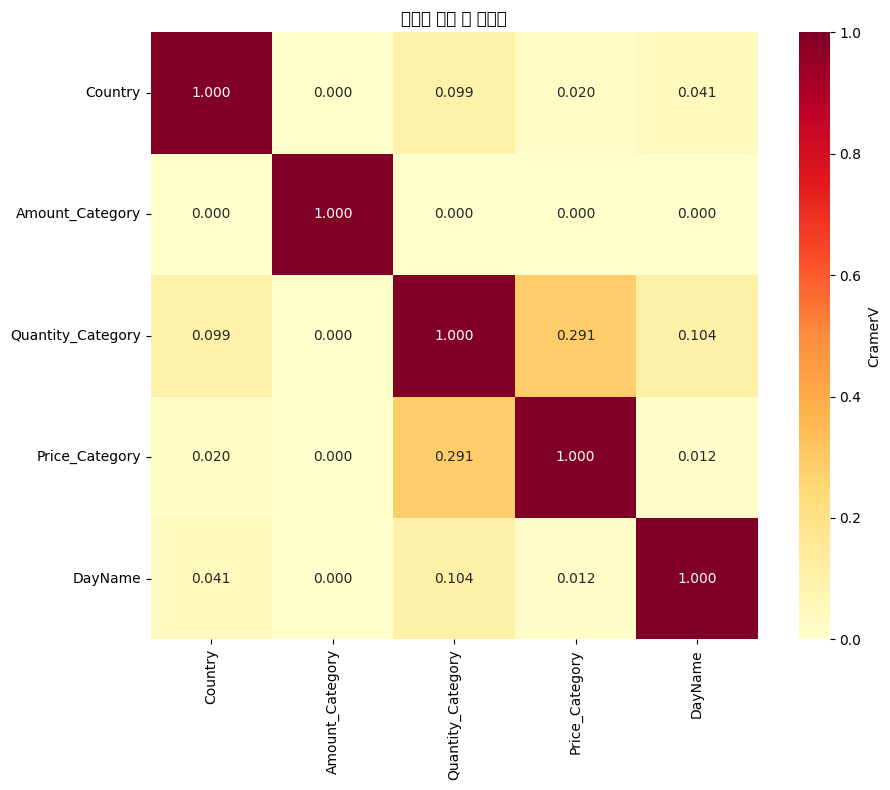

In [60]:
from scipy.stats import chi2_contingency

# 카이제곱 검정과 Cramer's V 분석
print('=== 카이제곱 검정 & Cramer\'s V 분석 ===')

df_analysis = df_major.copy()

# 범주형 변수로 변환

# 거래액 구간화
df_analysis['Amount_Cateogry'] = pd.qcut(df_analysis['TotalAmount'], q=4, labels=['저액', '중저액', '중고액', '고액'])
# 수량 구간화
df_analysis['Quantity_Category'] = pd.qcut(df_analysis['Quantity'], q=3, labels=['소', '중', '대'])
# 단가 구간화
df_analysis['Price_Category'] = pd.qcut(df_analysis['UnitPrice'], q=3, labels=['저가', '중가', '고가'])

# 크레머-v 계산기
def cramers_v(x, y):
    """Cramér's V 계산"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# 카테고리형 변수
categorical_vars = ['Country', 'Amount_Category', 'Quantity_Category', 'Price_Category', 'DayName']

# 분석효율을 위해 5개만 선택
top_5_countries = df_analysis['Country'].value_counts().head(5).index
df_analysis = df_analysis[df_analysis['Country'].isin(top_5_countries)]

# Cramér's V 매트릭스 계산
cramers_matrix = pd.DataFrame(index=categorical_vars, columns=categorical_vars)

for var1 in categorical_vars:
    for var2 in categorical_vars:
        if var1 == var2:
            cramers_matrix.loc[var1, var2] = 1.0
        else:
            try:
                cramers_matrix.loc[var1, var2] = cramers_v(df_analysis[var1], df_analysis[var2])
            except:
                cramers_matrix.loc[var1, var2] = 0.0

cramers_matrix = cramers_matrix.astype(float)


# Cramer 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_matrix, annot=True, fmt='.3f', cmap='YlOrRd', square=True, cbar_kws={'label': 'CramerV'})
plt.title('범주형 변수 간 연관성')
plt.tight_layout()
plt.show()

upper_triangle = np.triu(cramers_matrix.values, k=1)
strong_associations = []
